# pandas

## Exercises

About the exercises:
- The exercises have a different level of difficulty.
- Pick the ones you find most interesting and add your approaches to this notebook.
- You are not supposed to solve all of them now.
- If something is unclear or you need/want help, do not hesitate to ask - today is the time to do so.

### Confusion Matrix

 Answers to a multiple choice test (or classification problem) are listed in below DataFrame. `expected` corresponds to the correct outcome,`answer` represents the participants/classifiers answer/prediction.

 Summarize the results by means of a [Confusion Matrix](https://en.wikipedia.org/wiki/Confusion_matrix). Which result is correctly predicted most often?

 ```Python
 prng = np.random.RandomState(123)
 df = pd.DataFrame({'expected': prng.choice(['a', 'b', 'c', 'b'], size=30),
                    'answer': prng.choice(['a', 'b', 'c', 'b'], size=30)})
```

In [1]:
import numpy as np
import pandas as pd
prng = np.random.RandomState(123)
df = pd.DataFrame({'expected': prng.choice(['a', 'b', 'c', 'b'], size=30),
                   'answer': prng.choice(['a', 'b', 'c', 'b'], size=30)})
df.groupby(['answer', 'expected']).size().unstack()

expected  a  b  c
answer           
a         2  4  4
b         3  6  5
c         2  3  1

In [2]:
# alternatively
pd.crosstab(df['answer'], df['expected'])

expected  a  b  c
answer           
a         2  4  4
b         3  6  5
c         2  3  1

### Irregularily Sampled Data

 Below data (x, y, z) is given. Aggregate z over x- and y-bins defined as shown by computing the mean.

 Visualize the result. Are there empty cells?

 ```Python
 n = 400
 x, y = (np.random.rand(n) - 1/2) * 5, np.random.normal(size=n)
 z = x**3 + y ** 3

 width = 0.5
 bins = np.arange(-2, 2.1, width)
 ```

In [3]:
n = 400
x, y = (np.random.rand(n) - 1/2) * 5, np.random.normal(size=n)
z = x**3 + y ** 3

width = 0.5
bins = np.arange(-2, 2.1, width)

df = pd.DataFrame({'x': x, 'y': y, 'z': z})
df.head()

x         y          z
0 -0.164260  0.502587   0.122518
1 -1.588366 -0.137935  -4.009923
2  1.373081 -0.281017   2.566547
3  1.044619  0.513585   1.275385
4 -2.318740 -0.493913 -12.587330

In [4]:
import matplotlib.pyplot as plt

%matplotlib inline
fig, ax = plt.subplots()
df.plot.scatter(x='x', y='y', c='z', ax=ax, cmap='jet')

In [5]:
# np.digitize
pd.cut(df['x'], bins)

0       (-0.5, 0.0]
1      (-2.0, -1.5]
2        (1.0, 1.5]
3        (1.0, 1.5]
4               NaN
           ...     
395      (0.0, 0.5]
396             NaN
397    (-1.5, -1.0]
398      (0.0, 0.5]
399    (-1.0, -0.5]
Name: x, Length: 400, dtype: category
Categories (8, interval[float64]): [(-2.0, -1.5] < (-1.5, -1.0] < (-1.0, -0.5] < (-0.5, 0.0] < (0.0, 0.5] < (0.5, 1.0] < (1.0, 1.5] < (1.5, 2.0]]

In [6]:
# this is the idea
df['xbin'] = pd.cut(df['x'], bins)  # df['x'] < 0
df['ybin'] = pd.cut(df['y'], bins)  # df['y'] < 0
df.head()

x         y          z          xbin         ybin
0 -0.164260  0.502587   0.122518   (-0.5, 0.0]   (0.5, 1.0]
1 -1.588366 -0.137935  -4.009923  (-2.0, -1.5]  (-0.5, 0.0]
2  1.373081 -0.281017   2.566547    (1.0, 1.5]  (-0.5, 0.0]
3  1.044619  0.513585   1.275385    (1.0, 1.5]   (0.5, 1.0]
4 -2.318740 -0.493913 -12.587330           NaN  (-0.5, 0.0]

In [7]:
df_agg = df.groupby(['ybin', 'xbin'])['z'].mean().unstack()
df_agg

xbin          (-2.0, -1.5]  (-1.5, -1.0]  (-1.0, -0.5]  (-0.5, 0.0]  \
ybin                                                                  
(-2.0, -1.5]    -13.786821     -6.824246           NaN    -5.620866   
(-1.5, -1.0]     -6.106173     -4.044288     -2.144272    -2.022719   
(-1.0, -0.5]     -5.588069     -2.853098     -0.557497    -0.502378   
(-0.5, 0.0]      -5.729719     -2.172759     -0.579407    -0.089600   
(0.0, 0.5]       -5.405407     -1.915914     -0.391639     0.000653   
(0.5, 1.0]       -5.069394     -1.838196     -0.035717     0.550345   
(1.0, 1.5]       -2.938985      0.042806      1.071455     1.827151   
(1.5, 2.0]       -1.552104      2.568954      3.443768     5.104077   

xbin          (0.0, 0.5]  (0.5, 1.0]  (1.0, 1.5]  (1.5, 2.0]  
ybin                                                          
(-2.0, -1.5]   -4.956589   -4.693897   -3.014727         NaN  
(-1.5, -1.0]   -2.097369   -2.190680    0.091798    4.581886  
(-1.0, -0.5]   -0.627144    0.049306    2.097119    5.486786  
(-0.5, 0.0]    -0.027311         NaN    1.973936    5.844522  
(0.0, 0.5]      0.043841    0.625694    2.069975    5.635816  
(0.5, 1.0]      0.453974    0.878745    2.459610    5.801674  
(1.0, 1.5]      1.658695    2.355916    4.017050    6.919827  
(1.5, 2.0]      5.244074    5.167192         NaN    8.540021

In [8]:
bin_midpoints = bins[:-1] + np.diff(bins)/2
bin_midpoints

array([-1.75, -1.25, -0.75, -0.25,  0.25,  0.75,  1.25,  1.75])

In [9]:
# if we want different labels, e.g. bin-midpoints, we 
# pass them accordingly
df['xbin'] = pd.cut(df['x'], bins, labels=bin_midpoints).astype(np.float)  # conversion for plot
df['ybin'] = pd.cut(df['y'], bins, labels=bin_midpoints).astype(np.float)
df.head()

x         y          z  xbin  ybin
0 -0.164260  0.502587   0.122518 -0.25  0.75
1 -1.588366 -0.137935  -4.009923 -1.75 -0.25
2  1.373081 -0.281017   2.566547  1.25 -0.25
3  1.044619  0.513585   1.275385  1.25  0.75
4 -2.318740 -0.493913 -12.587330   NaN -0.25

In [10]:
df_agg = df.dropna().groupby(['ybin', 'xbin'])[['z']].mean().reset_index()
df_agg

ybin  xbin          z
0  -1.75 -1.75 -13.786821
1  -1.75 -1.25  -6.824246
2  -1.75 -0.25  -5.620866
3  -1.75  0.25  -4.956589
4  -1.75  0.75  -4.693897
5  -1.75  1.25  -3.014727
6  -1.25 -1.75  -6.106173
7  -1.25 -1.25  -4.044288
8  -1.25 -0.75  -2.144272
9  -1.25 -0.25  -2.022719
10 -1.25  0.25  -2.097369
11 -1.25  0.75  -2.190680
12 -1.25  1.25   0.091798
13 -1.25  1.75   4.581886
14 -0.75 -1.75  -5.588069
15 -0.75 -1.25  -2.853098
16 -0.75 -0.75  -0.557497
17 -0.75 -0.25  -0.502378
18 -0.75  0.25  -0.627144
19 -0.75  0.75   0.049306
20 -0.75  1.25   2.097119
21 -0.75  1.75   5.486786
22 -0.25 -1.75  -5.729719
23 -0.25 -1.25  -2.172759
24 -0.25 -0.75  -0.579407
25 -0.25 -0.25  -0.089600
26 -0.25  0.25  -0.027311
27 -0.25  1.25   1.973936
28 -0.25  1.75   5.844522
29  0.25 -1.75  -5.405407
30  0.25 -1.25  -1.915914
31  0.25 -0.75  -0.391639
32  0.25 -0.25   0.000653
33  0.25  0.25   0.043841
34  0.25  0.75   0.625694
35  0.25  1.25   2.069975
36  0.25  1.75   5.635816
37  0.75 -1.75  -5.069394
38  0.75 -1.25  -1.838196
39  0.75 -0.75  -0.035717
40  0.75 -0.25   0.550345
41  0.75  0.25   0.453974
42  0.75  0.75   0.878745
43  0.75  1.25   2.459610
44  0.75  1.75   5.801674
45  1.25 -1.75  -2.938985
46  1.25 -1.25   0.042806
47  1.25 -0.75   1.071455
48  1.25 -0.25   1.827151
49  1.25  0.25   1.658695
50  1.25  0.75   2.355916
51  1.25  1.25   4.017050
52  1.25  1.75   6.919827
53  1.75 -1.75  -1.552104
54  1.75 -1.25   2.568954
55  1.75 -0.75   3.443768
56  1.75 -0.25   5.104077
57  1.75  0.25   5.244074
58  1.75  0.75   5.167192
59  1.75  1.75   8.540021

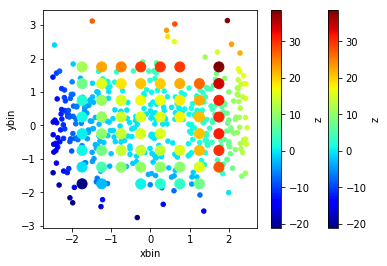

In [11]:
%matplotlib inline
fig, ax = plt.subplots()
df.plot.scatter(ax=ax, x='x', y='y', c='z', cmap='jet')
df_agg.plot.scatter(ax=ax, x='xbin', y='ybin', c='z', cmap='jet', s=100, marker='o')
# homework: remove second colorbar

### Wage Data

 Continue our exploration of the wage data set.
 
 How many representatives of each gender are in the data set?
 
 Which age group has the highes median income? Use `[0, 30, 60, 100]`
 as age groups. Create both a table and a plot.

 Which educational background is prevalent in the lower and upper 10% (of income)?
 Produce both a table and a plot (cf. seaborn).

### NO2 Emissions

 For the data given in `./data/AT90AKC0000800100hour.1-1-1988.31-12-2012`,
 compare hourly NO2 levels while differentiating between Mon-Fri and Sat-Sun. Note that the format is 'date', '00', 'flag', '01', 'flag', ... where 'hh' corresponds to the hour and 'flag' is a value we do not need.

 As exercise, bring the data in tidy (long) form before approaching above question.

 How would you go about it in the original format?